In [1]:
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image
import glob

# MNIST 1

In [2]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [6]:
pd.DataFrame(numpy.array(x_train).reshape(60000,784))

0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       777  778  779  780  781  782  783  
0        0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
59995    0    0    0    0    0    0    0  
59996    0    0    0    0    0    0    0  
59997    0    0    0    0    0    0    0  
59998    0    0    0    0    0    0    0  
59999    0    0    0    0    0    0    0  

[60000 rows x 784 columns]

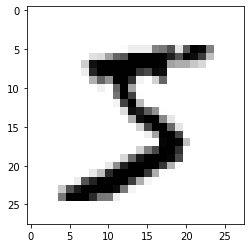

In [3]:
plt.imshow(x_train[np.where(y_train == 5)[0][0]], cmap="gray_r")

In [5]:
print(f"Die Zahl ist: {y_train[0]}")

Die Zahl ist: 5


## 18.4)
Es werden 10 Knoten für jede der möglichen Zahlen gebraucht

## 18.5)

In [6]:
model = tf.keras.Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

## 18.6)

In [68]:
train_images = x_train.reshape(60000,784)
test_images = x_test.reshape(10000,784)
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 4.7399 - accuracy: 0.9017
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6660 - accuracy: 0.9526
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4580 - accuracy: 0.9652
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3675 - accuracy: 0.9722
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3278 - accuracy: 0.9767


## 18.7)

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6686 - accuracy: 0.9632


[0.6685921549797058, 0.9631999731063843]

# MNIST 2
## 18.2.1)

In [10]:
model_history = model.fit(train_images, train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3016 - accuracy: 0.9791
Epoch 2/15
469/469 [==============================] - 3s 5ms/step - loss: 0.2817 - accuracy: 0.9817
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2436 - accuracy: 0.9841
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2360 - accuracy: 0.9848
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2318 - accuracy: 0.9861
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2022 - accuracy: 0.9878
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1925 - accuracy: 0.9892
Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1742 - accuracy: 0.9906
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1602 - accuracy: 0.9902
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1727 - accuracy: 0.9908

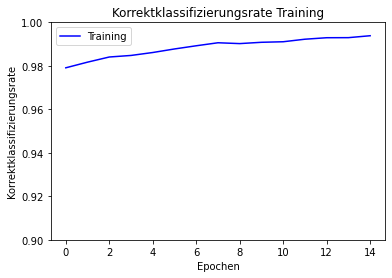

In [11]:
plt.plot(model_history.history["accuracy"], "b", label="Training")
plt.ylim(0.9, 1)
plt.title("Korrektklassifizierungsrate Training")
plt.xlabel("Epochen")
plt.ylabel("Korrektklassifizierungsrate")
plt.legend()
plt.show()

## 18.2.2)

In [49]:
model_history = model.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 5.7697 - accuracy: 0.8980 - val_loss: 0.8887 - val_accuracy: 0.9472
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.6458 - accuracy: 0.9542 - val_loss: 0.7007 - val_accuracy: 0.9508
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.4538 - accuracy: 0.9653 - val_loss: 0.5699 - val_accuracy: 0.9597
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3408 - accuracy: 0.9727 - val_loss: 0.6448 - val_accuracy: 0.9623
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2992 - accuracy: 0.9766 - val_loss: 0.7677 - val_accuracy: 0.9627
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2650 - accuracy: 0.9796 - val_loss: 0.6687 - val_accuracy: 0.9682
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2487 - accuracy: 0.9827 - val_loss: 0.6926 - val_accuracy: 0.9691
Epoch 

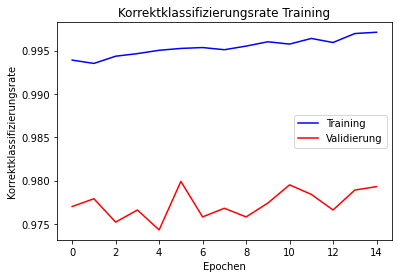

In [13]:
plt.plot(model_history.history["accuracy"], "b", label="Training")
plt.plot(model_history.history["val_accuracy"], "r", label="Validierung")
plt.title("Korrektklassifizierungsrate Training")
plt.xlabel("Epochen")
plt.ylabel("Korrektklassifizierungsrate")
plt.legend()
plt.show()

In [74]:
mean = np.mean(model_history.history["val_accuracy"])
max = np.max(model_history.history["val_accuracy"])
print(f"Mean Accuracy: {mean}")
print(f"Max Accuracy: {max}")

Mean Accuracy: 0.9669133345286052
Max Accuracy: 0.9746999740600586


# MNIST 3
## 18.3.1)

In [50]:
#crossX = np.apply_along_axis(lambda a: np.argmax(a), 1, model.predict(test_images))
#crossY = np.apply_along_axis(lambda a: np.argmax(a), 1, test_labels)
crossX = model.predict(test_images).argmax(axis=1)
crossY = test_labels.argmax(axis=1)
pd.crosstab(crossX, crossY, rownames=["actual"], colnames=["predicted"])

predicted    0     1    2    3    4    5    6     7    8    9
actual                                                       
0          972     1    5    0    0    4    3     1    7    2
1            1  1119    1    0    0    0    3     1    1    1
2            1     1  999    3    3    0    3     6    3    1
3            0     3    3  984    0    6    0     2    5    3
4            0     1    1    1  966    1    4     3    1   14
5            0     3    1   12    0  872    7     1    7    7
6            4     2    3    0    4    4  934     0    3    1
7            2     0    8    3    1    1    1  1001    2    6
8            0     4   11    2    0    3    2     4  942    3
9            0     1    0    5    8    1    1     9    3  971

In [38]:
test_labels.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## 18.3.2)

In [69]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [67]:
model_history = model.fit(train_images_norm, train_labels, epochs=15, batch_size=128, validation_data=(test_images_norm, test_labels))

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.2549 - accuracy: 0.9262 - val_loss: 0.1267 - val_accuracy: 0.9613
Epoch 2/15
469/469 [==============================] - 3s 5ms/step - loss: 0.1038 - accuracy: 0.9693 - val_loss: 0.0885 - val_accuracy: 0.9729
Epoch 3/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0678 - accuracy: 0.9797 - val_loss: 0.0873 - val_accuracy: 0.9748
Epoch 4/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0490 - accuracy: 0.9857 - val_loss: 0.0904 - val_accuracy: 0.9726
Epoch 5/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0679 - val_accuracy: 0.9788
Epoch 6/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0278 - accuracy: 0.9918 - val_loss: 0.0664 - val_accuracy: 0.9801
Epoch 7/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.0670 - val_accuracy: 0.9810
Epoch 

In [68]:
mean = np.mean(model_history.history["val_accuracy"])
max = np.max(model_history.history["val_accuracy"])
print(f"Mean Accuracy: {mean}")
print(f"Max Accuracy: {max}")

Mean Accuracy: 0.9780399998029073
Max Accuracy: 0.9828000068664551


## Non-normalized
### Epochs: 15, Batch: 128
Mean Accuracy: 0.9669133345286052  
Max Accuracy: 0.9746999740600586
## Normalized
### Epochs: 15, Batch: 128
Mean Accuracy: 0.9780399998029073  
Max Accuracy: 0.9828000068664551

## 18.3.3)

In [43]:
model = tf.keras.Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [44]:
model_history = model.fit(train_images_norm, train_labels, epochs=10, batch_size=1024, validation_data=(test_images_norm, test_labels))

Epoch 1/10
59/59 [==============================] - 1s 19ms/step - loss: 0.5207 - accuracy: 0.8511 - val_loss: 0.2710 - val_accuracy: 0.9232
Epoch 2/10
59/59 [==============================] - 1s 16ms/step - loss: 0.2402 - accuracy: 0.9317 - val_loss: 0.2158 - val_accuracy: 0.9371
Epoch 3/10
59/59 [==============================] - 1s 16ms/step - loss: 0.1742 - accuracy: 0.9506 - val_loss: 0.1519 - val_accuracy: 0.9553
Epoch 4/10
59/59 [==============================] - 1s 16ms/step - loss: 0.1359 - accuracy: 0.9614 - val_loss: 0.1253 - val_accuracy: 0.9644
Epoch 5/10
59/59 [==============================] - 1s 16ms/step - loss: 0.1074 - accuracy: 0.9694 - val_loss: 0.1089 - val_accuracy: 0.9668
Epoch 6/10
59/59 [==============================] - 1s 16ms/step - loss: 0.0900 - accuracy: 0.9740 - val_loss: 0.0939 - val_accuracy: 0.9721
Epoch 7/10
59/59 [==============================] - 1s 16ms/step - loss: 0.0741 - accuracy: 0.9787 - val_loss: 0.1011 - val_accuracy: 0.9699
Epoch 8/10
59

In [33]:
print(f"Mean Accuracy: {np.mean(model_history.history['val_accuracy'])}")
print(f"Max Accuracy: {np.max(model_history.history['val_accuracy'])}")
print(f"Mean Loss: {np.mean(model_history.history['val_loss'])}")
print(f"Max Loss: {np.max(model_history.history['val_loss'])}")

Mean Accuracy: 0.9832000136375427
Max Accuracy: 0.9832000136375427
Mean Loss: 0.16235847473144532
Max Loss: 0.16244646906852722


## epochs=
### 10
Mean Accuracy: 0.9831199884414673  
Max Accuracy: 0.983299970626831  
Mean Loss: 0.15986983925104142  
Max Loss: 0.1603856235742569
### 20
Mean Accuracy: 0.9831500053405762  
Max Accuracy: 0.9832000136375427  
Mean Loss: 0.1583306223154068  
Max Loss: 0.15942810475826263
### 50
Mean Accuracy: 0.9832499957084656  
Max Accuracy: 0.9833999872207642  
Mean Loss: 0.15396952748298645  
Max Loss: 0.15715792775154114

## batch_size=
### 64
Mean Accuracy: 0.9832399964332581  
Max Accuracy: 0.9833999872207642  
Mean Loss: 0.16125680059194564  
Max Loss: 0.16228044033050537
### 1024
Mean Accuracy: 0.9832000136375427  
Max Accuracy: 0.9832000136375427  
Mean Loss: 0.16235847473144532  
Max Loss: 0.16244646906852722

## 18.3.4)

In [45]:
model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9779


[0.07016461342573166, 0.9779000282287598]

In [52]:
model.save("model")
del model

INFO:tensorflow:Assets written to: model\assets


In [53]:
model.evaluate(test_images_norm, test_labels)
# => model is not defined

NameError: name 'model' is not defined

In [54]:
model = load_model("model")

In [55]:
model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9779


[0.07016461342573166, 0.9779000282287598]

# MNIST 4

In [22]:
img = Image.open("numbers/5.png").convert("L")
#img = np.asarray(img)
img

In [131]:
own_images = []
own_labels = []
for f in glob.iglob("numbers/*"):
    own_images.append(np.asarray(Image.open(f).convert("L")))
    file = f.split("\\")
    own_labels.append(int(file[len(file) - 1][0]))
    
own_images = np.array(own_images).reshape(len(own_images), 784) / 255.0

In [132]:
model = load_model("model")
pred = model.predict(own_images).argmax(axis=1)

In [134]:
df = pd.DataFrame({'predicted':pred, 'actual':own_labels})
df

predicted  actual
0          0       0
1          7       1
2          2       2
3          3       3
4          4       4
5          5       5
6          6       6
7          7       7
8          8       8
9          8       9